## Performance comparison on sequence classification problem of various deep learning methods

##### Apoorva Biseria
##### UBIT - abiseria
##### UBPERSON# -50291145

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Loading data (Skipping top 10 stop words)

In [0]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.imdb.load_data(num_words =10000,skip_top=10 )

In [0]:
print(x_train.shape)

(25000,)


### Preprocess data

In [0]:
#decided length of each review is 200, so padding reviews shorter than that, 
#or truncating the larger ones
def process_data(x):
  data = tf.keras.preprocessing.sequence.pad_sequences(x,maxlen=200)
  return data
  







### Perceptron Model

In [0]:
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
def Perceptron(x,y):

  model = Sequential()
  model.add(Embedding(10000,64,input_length = 200))
  model.add(Flatten())
  
  
  model.add(Dense(128 ))
  model.add(Activation('relu'))
  model.add(Dense(128 ))
  model.add(Activation('relu'))
  model.add(Dense(128 ))
  model.add(Activation('relu'))
  #model.add(Dropout(0.3))

  

  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model


In [0]:
train = process_data(x_train)
test = process_data(x_test)
model = Perceptron(train,y_train)

In [0]:
from keras.callbacks import  TensorBoard
tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= 512, write_graph= True)
history = model.fit(train
                    , y_train
                    ,validation_data =(test,y_test) 
                    , epochs=10
                    , batch_size=256
                    , callbacks = [tensorboard_cb]
                    )


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 1s 56us/step - loss: 0.4944 - acc: 0.7346 - val_loss: 0.3242 - val_acc: 0.8596
Epoch 2/10
25000/25000 [==============================] - 1s 28us/step - loss: 0.1768 - acc: 0.9318 - val_loss: 0.3736 - val_acc: 0.8489
Epoch 3/10
25000/25000 [==============================] - 1s 28us/step - loss: 0.0366 - acc: 0.9878 - val_loss: 0.6195 - val_acc: 0.8452
Epoch 4/10
25000/25000 [==============================] - 1s 28us/step - loss: 0.0070 - acc: 0.9979 - val_loss: 0.9582 - val_acc: 0.8339
Epoch 5/10
25000/25000 [==============================] - 1s 28us/step - loss: 0.0037 - acc: 0.9990 - val_loss: 1.2805 - val_acc: 0.8217
Epoch 6/10
25000/25000 [==============================] - 1s 28us/step - loss: 0.0018 - acc: 0.9992 - val_loss: 1.4012 - val_acc: 0.8289
Epoch 7/10
25000/25000 [==============================] - 1s 27us/step - loss: 0.0010 - acc: 0.9996 - val_loss: 1.3413 - val_acc

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbf95ea518>,
      dtype=object)

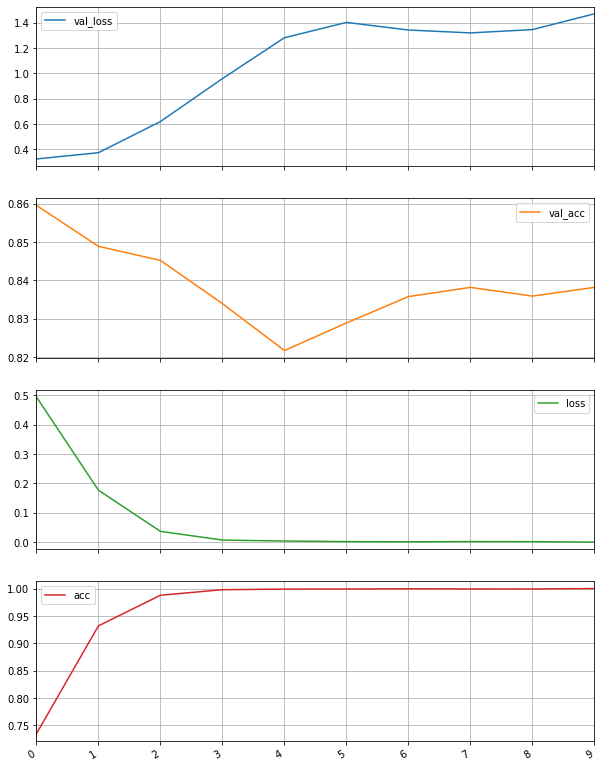

In [0]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [0]:
loss,accuracy = model.evaluate(test,y_test)

25000/25000 [==============================] - 1s 51us/step


#### Accuracy of perceptron model

In [0]:
accuracy = accuracy*100
print (accuracy)

83.816


In [0]:
scoresperceptron = model.predict(test)

### Convolutional Neural Network

In [0]:
from keras.layers import Conv1D,GlobalMaxPooling1D,GlobalAveragePooling1D

#### Using GlobalAveragePooling1D

In [0]:
from keras.layers import Conv1D
def CNNA(x,y):
  model = Sequential()
  model.add(Embedding(10000,64,input_length = 200))
  model.add(Conv1D(128,4,strides = 2,padding='valid'))
  model.add(Activation('relu'))

  model.add(Conv1D(64,4,strides = 1,padding='valid'))
  model.add(Activation('relu'))

  model.add(GlobalAveragePooling1D())
  
  model.add(Dense(32 ))
  model.add(Activation('relu'))
  model.add(Dense(16 ))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  

  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model


In [0]:

modelCNNA = CNNA(train,y_train)

In [0]:
history = modelCNNA.fit(train
                    , y_train
                    ,validation_data =(test,y_test) 
                    , epochs=10
                    , batch_size=256
                    , callbacks = [tensorboard_cb]
                    )

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 2s 98us/step - loss: 0.4989 - acc: 0.7506 - val_loss: 0.4028 - val_acc: 0.8173
Epoch 2/10
25000/25000 [==============================] - 1s 45us/step - loss: 0.3049 - acc: 0.8790 - val_loss: 0.3596 - val_acc: 0.8401
Epoch 3/10
25000/25000 [==============================] - 1s 44us/step - loss: 0.2441 - acc: 0.9091 - val_loss: 0.3109 - val_acc: 0.8696
Epoch 4/10
25000/25000 [==============================] - 1s 44us/step - loss: 0.2063 - acc: 0.9253 - val_loss: 0.3255 - val_acc: 0.8687
Epoch 5/10
25000/25000 [==============================] - 1s 44us/step - loss: 0.1765 - acc: 0.9383 - val_loss: 0.3368 - val_acc: 0.8618
Epoch 6/10
25000/25000 [==============================] - 1s 45us/step - loss: 0.1482 - acc: 0.9490 - val_loss: 0.3831 - val_acc: 0.8601
Epoch 7/10
25000/25000 [==============================] - 1s 45us/step - loss: 0.1227 - acc: 0.9606 - val_loss: 0.4338 - val_acc

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbf99a33c8>,
      dtype=object)

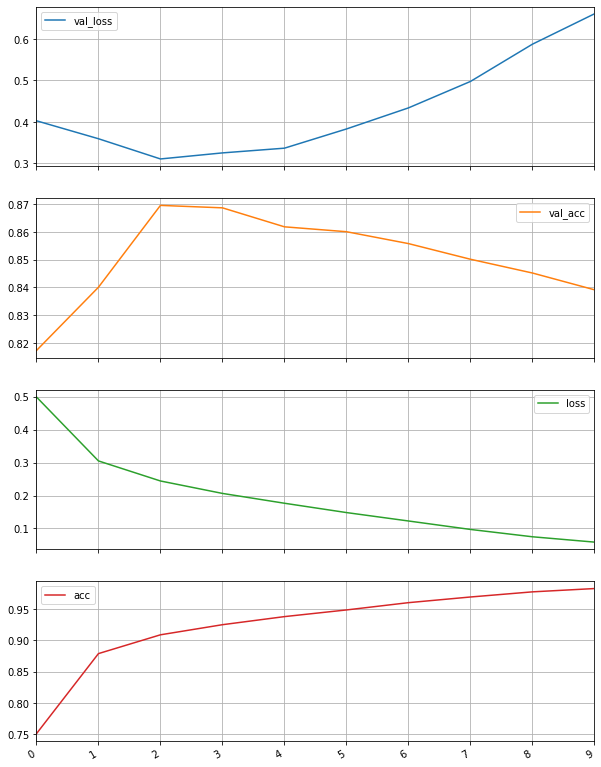

In [0]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [0]:
loss,accuracyCNNA = modelCNNA.evaluate(test,y_test)

25000/25000 [==============================] - 1s 50us/step


#### Accuracy of CNN model with globalAveragePooling1D

In [0]:
accuracyCNNA = accuracyCNNA*100
print(accuracyCNNA)

83.916


In [0]:
scoresCNNA = modelCNNA.predict(test)

#### Using GLobalMaxPooling1D

In [0]:
from keras.layers import Conv1D
def CNNM(x,y):
  model = Sequential()
  model.add(Embedding(10000,64,input_length = 200))
  model.add(Conv1D(128,4,strides = 2,padding='valid'))
  model.add(Activation('relu'))

  model.add(Conv1D(64,4,strides = 1,padding='valid'))
  model.add(Activation('relu'))

  model.add(GlobalAveragePooling1D())
  
  model.add(Dense(32 ))
  model.add(Activation('relu'))
  model.add(Dense(16 ))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  

  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model


In [0]:
modelCNNM = CNNM(train,y_train)

In [0]:
history = modelCNNM.fit(train
                    , y_train
                    ,validation_data =(test,y_test) 
                    , epochs=10
                    , batch_size=256
                    , callbacks = [tensorboard_cb]
                    )

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 2s 78us/step - loss: 0.5521 - acc: 0.6913 - val_loss: 0.3471 - val_acc: 0.8551
Epoch 2/10
25000/25000 [==============================] - 1s 45us/step - loss: 0.3104 - acc: 0.8757 - val_loss: 0.3480 - val_acc: 0.8529
Epoch 3/10
25000/25000 [==============================] - 1s 45us/step - loss: 0.2456 - acc: 0.9052 - val_loss: 0.3176 - val_acc: 0.8676
Epoch 4/10
25000/25000 [==============================] - 1s 46us/step - loss: 0.2069 - acc: 0.9231 - val_loss: 0.3080 - val_acc: 0.8720
Epoch 5/10
25000/25000 [==============================] - 1s 46us/step - loss: 0.1719 - acc: 0.9396 - val_loss: 0.3439 - val_acc: 0.8629
Epoch 6/10
25000/25000 [==============================] - 1s 44us/step - loss: 0.1441 - acc: 0.9508 - val_loss: 0.4278 - val_acc: 0.8486
Epoch 7/10
25000/25000 [==============================] - 1s 45us/step - loss: 0.1184 - acc: 0.9605 - val_loss: 0.5144 - val_acc

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbfab27048>,
      dtype=object)

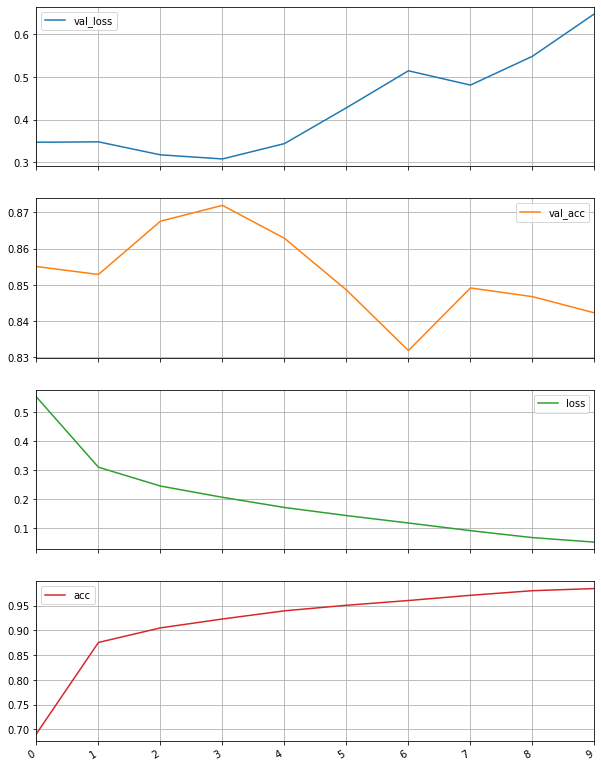

In [0]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [0]:
loss,accuracyCNNM = modelCNNM.evaluate(test,y_test)


25000/25000 [==============================] - 1s 50us/step


#### Accuracy with GlobalMaxPooling1D

In [0]:
accuracyCNNM = accuracyCNNM*100
print(accuracyCNNM)

84.22800000000001


In [0]:
scoresCNNM = modelCNNM.predict(test)

### Using SimpleRNN

In [0]:
from keras.layers import SimpleRNN
from keras.layers import SimpleRNN
def RNN(x,y):
  model = Sequential()
  model.add(Embedding(10000,64,input_length = 200))
  model.add(SimpleRNN(64))
  
  
  
  model.add(Dense(32 ))
  model.add(Activation('relu'))
  model.add(Dense(16 ))
  model.add(Activation('relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  

  
  

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model


In [0]:
modelRNN = RNN(train,y_train)

In [0]:
history = modelRNN.fit(train
                    , y_train
                    ,validation_data =(test,y_test) 
                    , epochs=5
                    , batch_size=256
                    , callbacks = [tensorboard_cb]
                    )

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 20s 792us/step - loss: 0.6737 - acc: 0.5715 - val_loss: 0.6143 - val_acc: 0.6406
Epoch 2/5
25000/25000 [==============================] - 19s 745us/step - loss: 0.4600 - acc: 0.8010 - val_loss: 0.5306 - val_acc: 0.7410
Epoch 3/5
25000/25000 [==============================] - 18s 738us/step - loss: 0.3360 - acc: 0.8680 - val_loss: 0.4477 - val_acc: 0.7946
Epoch 4/5
25000/25000 [==============================] - 18s 736us/step - loss: 0.2434 - acc: 0.9108 - val_loss: 0.4417 - val_acc: 0.8157
Epoch 5/5
25000/25000 [==============================] - 18s 733us/step - loss: 0.1641 - acc: 0.9431 - val_loss: 0.5430 - val_acc: 0.8320


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbf629e3c8>,
      dtype=object)

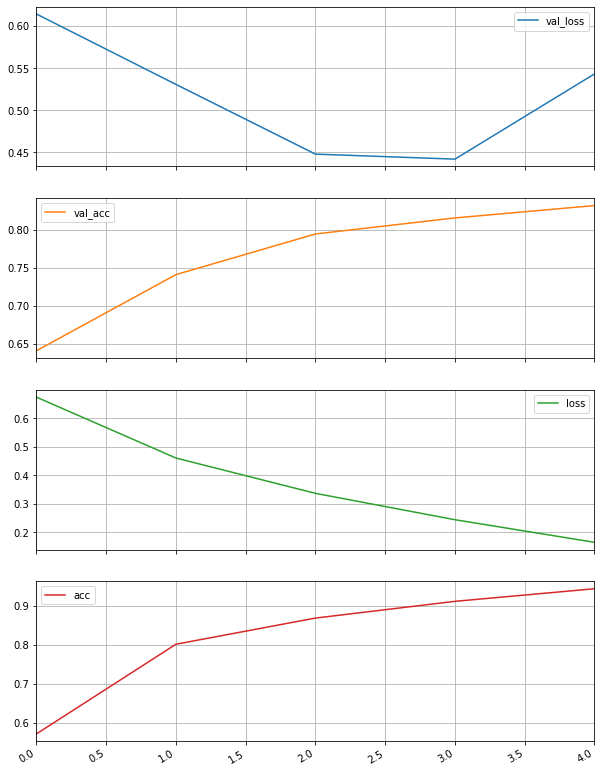

In [0]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [0]:
loss,accuracyRNN = modelRNN.evaluate(test,y_test)

25000/25000 [==============================] - 56s 2ms/step


#### Accuracy on 1 layer RNN

In [0]:
accuracyRNN = accuracyRNN*100
print(accuracyRNN)

83.2


In [0]:
scoresRNN = modelRNN.predict(test)

### RNN with multiple layers

In [0]:
from keras.layers import SimpleRNN
def RNN2(x,y):
  model = Sequential()
  model.add(Embedding(10000,64,input_length = 200))
  model.add(SimpleRNN(64,return_sequences=True))
  model.add(Activation('tanh'))
  model.add(Dropout(0.1))

  model.add(SimpleRNN(64))
  model.add(Activation('tanh'))
  #model.add(Dropout(0.1))

  
  
  model.add(Dense(32 ))
  model.add(Activation('relu'))
  model.add(Dense(16 ))
  model.add(Activation('relu'))
  #model.add(Dropout(0.3))

  

  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [0]:
modelRNN2 = RNN2(train,y_train)

In [0]:
history = modelRNN2.fit(train
                    , y_train
                    ,validation_data =(test,y_test) 
                    , epochs=10
                    , batch_size=256
                    , callbacks = [tensorboard_cb]
                    )

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.6573 - acc: 0.5875 - val_loss: 0.4811 - val_acc: 0.7754
Epoch 2/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.4514 - acc: 0.8017 - val_loss: 0.3879 - val_acc: 0.8403
Epoch 3/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.3606 - acc: 0.8498 - val_loss: 0.5729 - val_acc: 0.7063
Epoch 4/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.3358 - acc: 0.8607 - val_loss: 0.4205 - val_acc: 0.8012
Epoch 5/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.2930 - acc: 0.8884 - val_loss: 0.3744 - val_acc: 0.8428
Epoch 6/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.2450 - acc: 0.9056 - val_loss: 0.3950 - val_acc: 0.8415
Epoch 7/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.1916 - acc: 0.9274 - val_loss: 0.4789 - val_acc

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbfb2ebac8>,
      dtype=object)

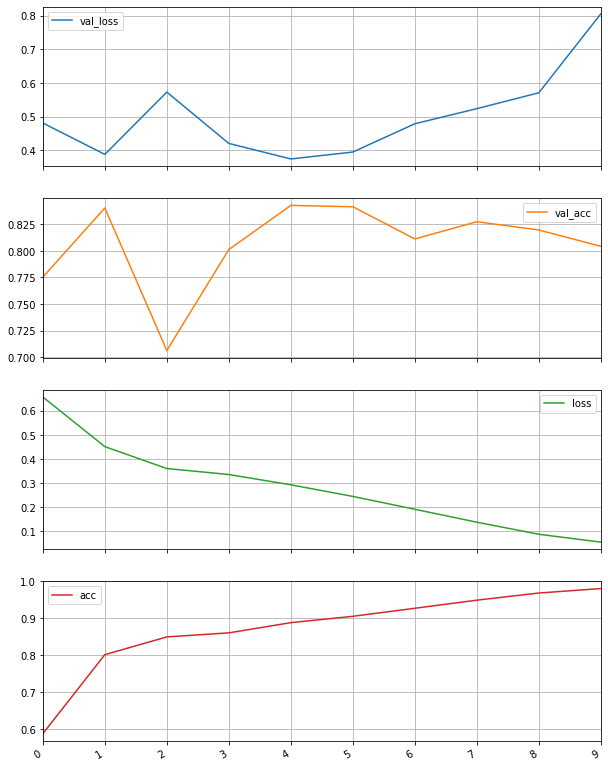

In [0]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [0]:
loss,accuracyRNN2 = modelRNN2.evaluate(test,y_test)

25000/25000 [==============================] - 115s 5ms/step


#### Accuracy of multilayer RNN

In [0]:
accuracyRNN2 = accuracyRNN2*100
print(accuracyRNN2)

80.428


In [0]:
scoresRNN2 = modelRNN2.predict(test)

### LSTM

##### LSTM with 1 layer

In [0]:
from keras.layers import LSTM
def LSTMfunction(x,y):
  model = Sequential()
  model.add(Embedding(10000,64,input_length = 200))
  model.add(LSTM(64))
  model.add(Activation('tanh'))
  

  

  
  
  model.add(Dense(32 ))
  model.add(Activation('relu'))
  model.add(Dense(16 ))
  model.add(Activation('relu'))
  #model.add(Dropout(0.3))

  

  model.add(Dense(1 ))
  model.add(Activation('sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [0]:
modelLSTM = LSTMfunction(train,y_train)

In [0]:
history = modelLSTM.fit(train
                    , y_train
                    ,validation_data =(test,y_test) 
                    , epochs=10
                    , batch_size=256
                    , callbacks = [tensorboard_cb]
                    )

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 42s 2ms/step - loss: 0.5529 - acc: 0.7357 - val_loss: 0.3503 - val_acc: 0.8548
Epoch 2/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.3286 - acc: 0.8668 - val_loss: 0.4640 - val_acc: 0.7945
Epoch 3/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.2677 - acc: 0.8940 - val_loss: 0.3536 - val_acc: 0.8537
Epoch 4/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.2370 - acc: 0.9077 - val_loss: 0.3139 - val_acc: 0.8663
Epoch 5/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.2081 - acc: 0.9203 - val_loss: 0.3333 - val_acc: 0.8605
Epoch 6/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.1885 - acc: 0.9280 - val_loss: 0.5835 - val_acc: 0.8192
Epoch 7/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.1709 - acc: 0.9353 - val_loss: 0.4045 - val_acc

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbac37a6c18>,
      dtype=object)

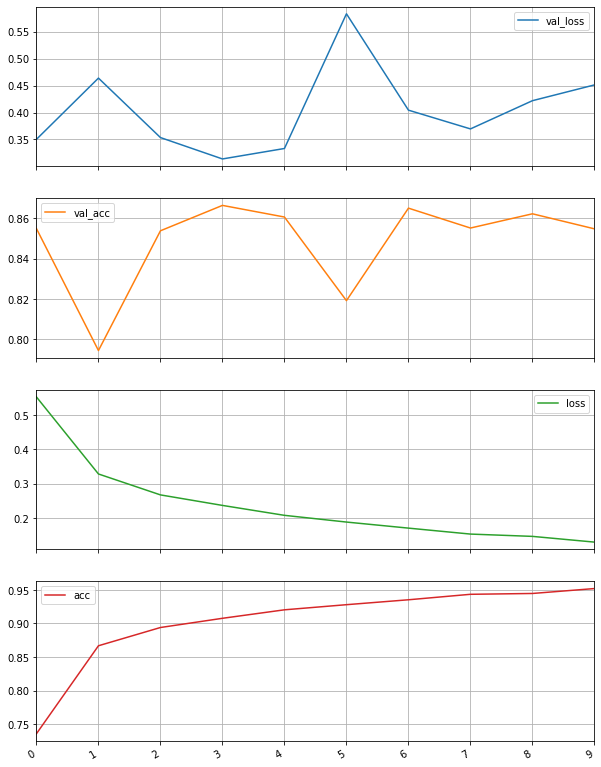

In [0]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [0]:
loss,accuracyLSTM = modelLSTM.evaluate(test,y_test)

25000/25000 [==============================] - 86s 3ms/step


##### Accuracy of single layer LSTM

In [0]:
accuracyLSTM = accuracyLSTM*100
print(accuracyLSTM)

85.468


In [0]:
scoresLSTM = modelLSTM.predict(test)

#### LSTM with multiple layers

In [0]:
from keras.layers import LSTM
def LSTMfunction2(x,y):
  model = Sequential()
  model.add(Embedding(10000,64,input_length = 200))
  model.add(LSTM(64,recurrent_dropout=0.3,return_sequences=True))
  model.add(Activation('tanh'))
  
  

  model.add(LSTM(64))
  model.add(Activation('tanh'))

  model.add(Dense(1 ))
  model.add(Activation('sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [0]:
modelLSTM2 = LSTMfunction2(train,y_train)

In [0]:
history = modelLSTM2.fit(train
                    , y_train
                    ,validation_data =(test,y_test) 
                    , epochs=10
                    , batch_size=256
                    )

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 88s 4ms/step - loss: 0.5208 - acc: 0.7367 - val_loss: 0.4653 - val_acc: 0.7820
Epoch 2/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.3398 - acc: 0.8580 - val_loss: 0.3326 - val_acc: 0.8596
Epoch 3/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.2843 - acc: 0.8846 - val_loss: 0.3482 - val_acc: 0.8490
Epoch 4/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.2444 - acc: 0.9052 - val_loss: 0.3327 - val_acc: 0.8657
Epoch 5/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.2213 - acc: 0.9155 - val_loss: 0.4164 - val_acc: 0.8275
Epoch 6/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.2035 - acc: 0.9226 - val_loss: 0.4245 - val_acc: 0.8422
Epoch 7/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.1792 - acc: 0.9322 - val_loss: 0.3788 - val_acc

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbfb95b860>,
      dtype=object)

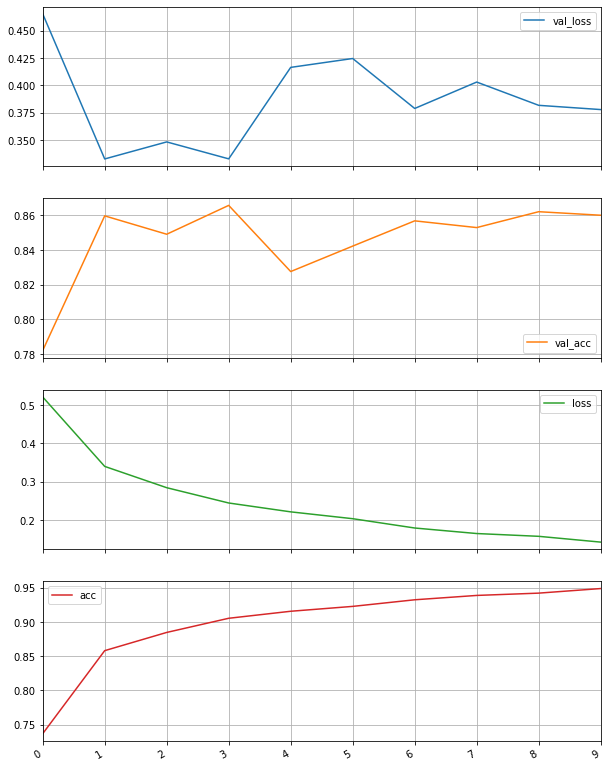

In [0]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [0]:
loss,accuracyLSTM2 = modelLSTM2.evaluate(test,y_test)

25000/25000 [==============================] - 179s 7ms/step


####Accuracy with multilayer LSTM

In [0]:
accuracyLSTM2 = accuracyLSTM2*100
print(accuracyLSTM2)

86.0


In [0]:
scoresLSTM2 = modelLSTM2.predict(test)

### Convolution along with LSTM

In [0]:
from keras.layers import LSTM
def LSTMConvfunction(x,y):
  model = Sequential()
  model.add(Embedding(10000,64,input_length = 200))
  model.add(Conv1D(128,4,strides = 2,padding='valid'))
  model.add(Activation('relu'))
  
  model.add(LSTM(64))
  model.add(Activation('tanh'))
  model.add(Dense(32 ))
  model.add(Activation('relu'))
  model.add(Dense(1 ))
  model.add(Activation('sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [0]:
modelLSTMConv = LSTMConvfunction(train,y_train)

In [0]:
history = modelLSTMConv.fit(train
                    , y_train
                    ,validation_data =(test,y_test) 
                    , epochs=5
                    , batch_size=256
                    )

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 21s 828us/step - loss: 0.0240 - acc: 0.9929 - val_loss: 0.8060 - val_acc: 0.8454
Epoch 2/5
25000/25000 [==============================] - 20s 819us/step - loss: 0.0214 - acc: 0.9954 - val_loss: 0.8893 - val_acc: 0.8205
Epoch 3/5
25000/25000 [==============================] - 21s 830us/step - loss: 0.0207 - acc: 0.9950 - val_loss: 0.9086 - val_acc: 0.8208
Epoch 4/5
25000/25000 [==============================] - 21s 829us/step - loss: 0.0185 - acc: 0.9954 - val_loss: 0.8098 - val_acc: 0.8362
Epoch 5/5
25000/25000 [==============================] - 21s 824us/step - loss: 0.0085 - acc: 0.9982 - val_loss: 0.9927 - val_acc: 0.8409


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbf7e7c5c0>,
      dtype=object)

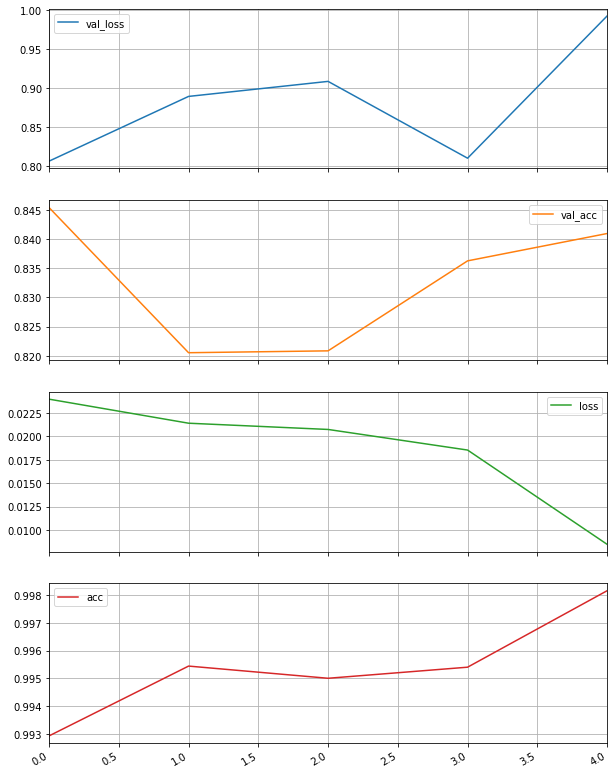

In [0]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [0]:
loss,accuracyLSTMConv = modelLSTMConv.evaluate(test,y_test)

25000/25000 [==============================] - 44s 2ms/step


#### Accuracy with LSTM and Convolution

In [0]:
accuracyLSTMConv = accuracyLSTMConv*100
print(accuracyLSTM)

85.468


In [0]:
scoresLSTMConv = modelLSTMConv.predict(test)

In [0]:
sp = [0] *25000
scna =[0] *25000
scnm = [0] *25000
srnn = [0] *25000
srnn2 = [0] *25000
slstm = [0] *25000
slstm2 =[0] *25000
slc = [0] *25000

for i in range(25000):
  if(scoresperceptron[i]>0.5):
    sp[i] =1
  if(scoresCNNA[i]>0.5):
    scna[i]=1
  if(scoresCNNM[i]>0.5):
    scnm[i]=1
  if(scoresRNN[i]>0.5):
    srnn[i]=1
  if(scoresRNN2[i]>0.5):
    srnn2[i]=1
  if(scoresLSTM[i]>0.5):
    slstm[i]=1
  if(scoresLSTM2[i]>0.5):
    slstm2[i]=1
  if(scoresLSTMConv[i]>0.5):
    slc[i]=1
  

### Ensemble model

In [0]:
final =[0]* 25000
for i in range(len(y_test)):
    ones = 0
    zeros =0
    if(sp[i]==1):
      ones+=1
    else:
      zeros+=1
    if(scna[i]==1):
      ones+=1
    else:
      zeros+=1
    if(scnm[i]==1):
      ones+=1
    else:
      zeros+=1
    if(scnm[i]==1):
      ones+=1
    else:
      zeros+=1
    if(srnn[i]==1):
      ones+=1
    else:
      zeros+=1
    if(srnn2[i]==1):
      ones+=1
    else:
      zeros+=1
    if(slstm[i]==1):
      ones+=1
    else:
      zeros+=1
    if(slstm2[i]==1):
      ones+=1
    else:
      zeros+=1
    if(slc[i]==1):
      ones+=1
    else:
      zeros+=1
    if(ones>zeros):
      final[i]=1

    

    

In [0]:
correct = 0
wrong = 0
for i in range(25000):
    if (final[i] == y_test[i]):
        correct = correct +1
    else:
        wrong = wrong + 1
        
print (correct)

21731


#### Accuracy of ensemble model

In [0]:
acc = (correct/25000)*100
print(acc)

86.924


### Accuracy of all models


In [0]:
print("Accuracy of perceptron:  ", accuracy )
print("Accuracy of Convolution with GLobalAveragePooling1D: ", accuracyCNNA )
print("Accuracy of Convolution with GLobalMaxPooling1D: ", accuracyCNNM )
print("Accuracy of SimpleRNN with 1 layer ", accuracyRNN )
print("Accuracy of SimpleRNN with more layers ", accuracyRNN2 )
print("Accuracy of LSTM with 1 layer ", accuracyLSTM )
print("Accuracy of LSTM with more layers ", accuracyLSTM2 )
print("Accuracy of LSTM and convolution: ", accuracyLSTMConv )



Accuracy of perceptron:   83.816
Accuracy of Convolution with GLobalAveragePooling1D:  83.916
Accuracy of Convolution with GLobalMaxPooling1D:  84.22800000000001
Accuracy of SimpleRNN with 1 layer  83.2
Accuracy of SimpleRNN with more layers  80.428
Accuracy of LSTM with 1 layer  85.468
Accuracy of LSTM with more layers  86.0
Accuracy of LSTM and convolution:  84.092


### Data (https://jamesmccaffrey.wordpress.com/2018/04/19/inspecting-the-imdb-dataset-vocabulary-set/)

In [0]:
from keras.datasets import imdb

In [0]:
i =imdb.get_word_index()

1646592/1641221 [==============================] - 2s 1us/step


In [0]:
len(i)

88584

In [0]:
words_freq_list = []
for (k,v) in i.items():
  words_freq_list.append((v,k))

In [0]:
index_arr = sorted(words_freq_list, key=lambda x:x[0])

In [0]:
index_arr[:10]

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i')]

In [0]:
index_arr[-10:]

[(88575, 'ev'),
 (88576, 'chicatillo'),
 (88577, 'transacting'),
 (88578, 'sics'),
 (88579, 'wheelers'),
 (88580, "pipe's"),
 (88581, 'copywrite'),
 (88582, 'artbox'),
 (88583, "voorhees'"),
 (88584, "'l'")]

In [0]:
for i in x_train[0]:
  print (index_arr[i][1] ,end=' ')

a for are movie has hour appear animal animals had laugh someone's can pretend a cast like having a he think has hear acting when important a a from totally dvd a old a lot acting few a completely wonderful just a lot charlotte violent but slow or as fans a long when movie a though revealed on for are a gene bottle wanted a are we most was movie has hour or will with as aspect a are but car but was movie ends film a a really episode was a half a seen a a irritating precisely movie totally can craig who a these was movie or taken a he better very like scenes good he green who a are was saw all do up a for lines movie first a a a many where colin with having a a a davies a predictable like we has hour amazing be perfect excellent there a a a recently as films don't a came with said movies they lewis even be back a that's invested film a far are you why amazing be totally a those by disappears film very like all music way he films a far had movie or excuse don't was movie shows a movie de

In [0]:
print(x_train[0], end = ' ')

[2, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 4536, 1111, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2025, 19, 14, 22, 2, 1920, 4613, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2223, 5244, 16, 480, 66, 3785, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 2, 2, 2, 107, 117, 5952, 15, 256, 2, 2, 2, 3766, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 1029, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 2, 194, 7486, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 2, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 